In [1]:
import sys
sys.path.append('../')
from pyACC.clustering import *
import camb
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:
omegab=0.05
omegac=0.25
h=0.7
As=2.1e-9
ns = 0.96

In [3]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h,ombh2=omegab*h**2,omch2=omegac*h**2)
pars.InitPower.set_params(As=As,ns=ns)
pars.set_matter_power(redshifts=[10], kmax=10)

#Linear spectra
#pars.NonLinear = none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints =512)

In [4]:
pk_func = interp1d(kh,pk[0],kind='cubic',fill_value='extrapolate')

In [5]:
side = 500 #Mpc
Volume = side**3

n_cells=100 #100**3 cells in the cube
spacing =side/n_cells


In [6]:
delta_k,delta_x = generate_gaussian_map(pk_func,side,spacing)

In [7]:
nobj = 100000
catalog = poisson_sample_map(delta_x,side,spacing,nobj)

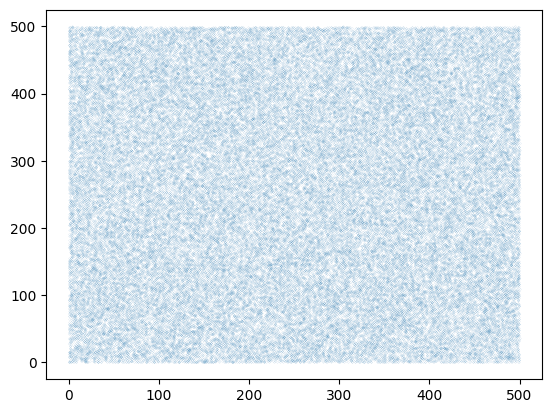

In [8]:
plt.plot(catalog[:,0],catalog[:,2],".",ms=0.1)

In [9]:
#count pairs
r_edges = np.linspace(0,50,11)


In [10]:
random_catalog =  np.random.uniform(0,side,(nobj,3))

correggi e finisci quello che manca

In [11]:
DD = count_pairs(catalog,r_edges)
RR = count_pairs(random_catalog,r_edges)
DR = count_pairs(catalog, r_edges, data2=random_catalog)

  0%|          | 0/99235 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/99235 [00:00<?, ?it/s]

In [12]:
DD_norm = DD / (len(catalog)*(len(catalog)-1)/2)
RR_norm = RR/ (len(random_catalog)*(len(random_catalog)-1)/2)
DR_norm = DR/ (len(catalog)*len(random_catalog))

In [13]:
xi = (DD_norm - 2*DR_norm + RR_norm)/RR_norm

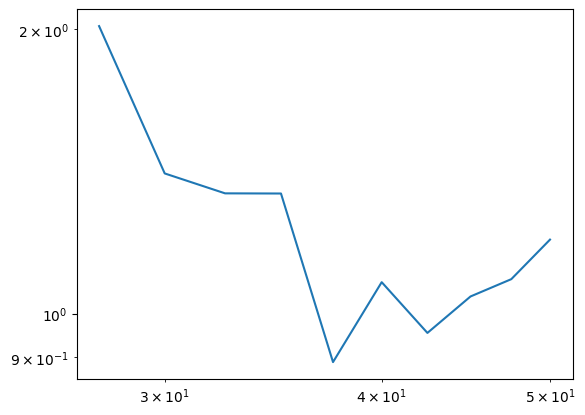

In [14]:
r_bin = 0.5*(r_edges[1:]+r_edges[-1])
plt.loglog(r_bin,xi)
